<a href="https://colab.research.google.com/github/J-Chaudhary/test/blob/master/CISC520.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CISC 520-51- B-2020/Late Spring - Data Engineering and Mining**

Student: Jignesh Chaudhary(id.197320), Instructor:  Khaled Iskandarani
# **Final Project**

## **Time Series forcast of financial Instrument**

Time series data collected from the real-life things. we can use this time series data on computer to get graphical and numerical outputs. The output of the analysis tells us more about real-life situation. It can be used to make a prediction of future values. 

The time series is a series of numerical measurement of the same entity taken at equally spaced intervals over time. Time series data can be collected yearly, monthly, weekly, daily, or even hourly.  

Time series data has four aspect of behaviour Trend, Seasonality, Cycles and Unexplained variation. They can also be a irregularities or outliers in the data which can be related back to real-world occurrences. Trend is the overall long term direction of the series. Seasonality occurs when there is a repeated behaviour in the data which occurs a regular intervals. Seasonality is related to seasonal, netural or human behaviour. Cycles occure when the series follows an up and down pattern it is not seasonal. The cycles can be a verying lenght which makes them more difficult to detect then the seasonality. In all data there is random variation, some tome series can be very regular with literal random variation while other may consist of not much else. Some time there is strange dips and jumps in a series these can be du to one-off event such as an economical crices in financial market or recent example is the Corona pendemic which effects the financial markets all over the world. 
There are many computer modules that can help to do the mechanics of time series analysis. It is very important to relate the methematical aspects of the series to the real-life application. This is make time series analysis so interasting.    
There are many python modules available for time series analysis such as numpy, pandas, scipy, scikit learn, Statsmodel, matplotlib and datetime. the models available for forcasting are ARIMA model, fbprophat and many more.

For this final project I am using daily data of Dow Jones Industrial Index (^DJI) from Yahoo finance portal. Yahoo! collects financial data from data vendors. Yahoo! finance is a media property that part of Yahoo!’s network. Yahoo! Finance provides financial news, data and various online tools that can help investors to track their portfolio values and future investment opportunities. 

**Details of collected data**

**Ticker:** Dow Jones Industrial Average (^DJI)

**Primary time unit:** Date


I am using fbprophet module form python to predict the future price of selected financial instrument. 

Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.
The input to Prophet is always a data frame with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric and represents the measurement we wish to forecast.

# **Test Case 1**

In [0]:
import pandas as pd          # pandas library
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
import pandas_datareader as web # get data form yahoo
from fbprophet import Prophet # fbprophet model

In [220]:
# Importing data form yahoo finance using pandas datareader 
df = web.DataReader('^DJI', data_source='yahoo', start='2018-06-01', end='2020-06-11')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-06-01,24673.599609,24542.089844,24542.089844,24635.210938,315710000,24635.210938
2018-06-04,24859.369141,24722.140625,24727.550781,24813.689453,340400000,24813.689453
2018-06-05,24838.779297,24710.820312,24820.119141,24799.980469,306340000,24799.980469
2018-06-06,25146.460938,24854.140625,24854.140625,25146.390625,316090000,25146.390625
2018-06-07,25326.089844,25164.480469,25192.140625,25241.410156,357680000,25241.410156
...,...,...,...,...,...,...
2020-06-05,27338.300781,26836.800781,26836.800781,27110.980469,542310000,27110.980469
2020-06-08,27580.210938,27232.480469,27232.929688,27572.439453,430200000,27572.439453
2020-06-09,27447.369141,27151.060547,27447.369141,27272.300781,381430000,27272.300781


In [221]:
# To get the shape of the data (number of raws and column)
df.shape

(511, 6)

In [222]:
# To get column names
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [223]:
# created Date column using index
df['Date'] = df.index
df.head(3)

,High,Low,Open,Close,Volume,Adj Close,Date
Date,,,,,,,
2018-06-01,24673.599609,24542.089844,24542.089844,24635.210938,315710000,24635.210938,2018-06-01
2018-06-04,24859.369141,24722.140625,24727.550781,24813.689453,340400000,24813.689453,2018-06-04
2018-06-05,24838.779297,24710.820312,24820.119141,24799.980469,306340000,24799.980469,2018-06-05


In [0]:
# change closing proce to log
df['Close'] = np.log(df['Close'])

In [225]:
# create new dataframe with only Date and Close price colum
df1=df.loc[:,['Date','Close']]
df1.head()

,Date,Close
Date,,
2018-06-01,2018-06-01,10.111932
2018-06-04,2018-06-04,10.119151
2018-06-05,2018-06-05,10.118598
2018-06-06,2018-06-06,10.132470
2018-06-07,2018-06-07,10.136241


Text(0.5, 0, 'Date')

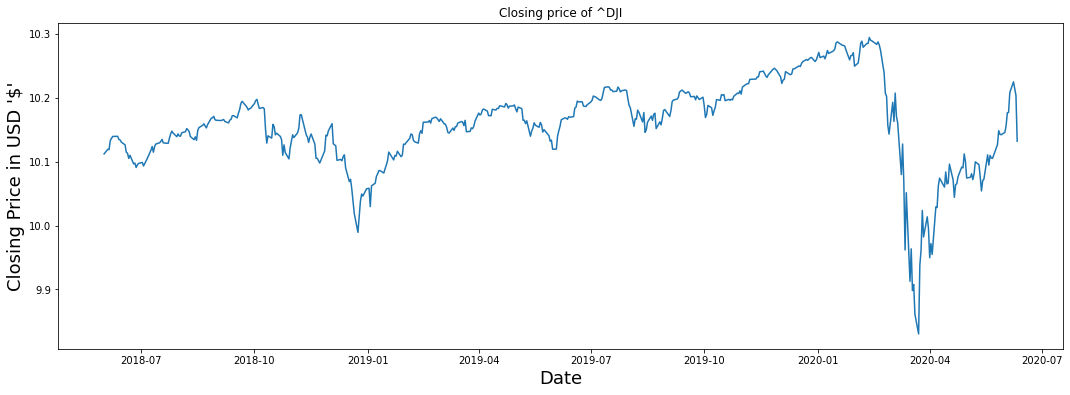

In [226]:
# Ploting the data using pyplot 
plt.figure(figsize=(18,6))
plt.title('Closing price of ^DJI')
plt.plot(df1['Close'])
plt.ylabel("Closing Price in USD '$'",fontsize=18)
plt.xlabel("Date", fontsize=18)

**We required to change the column name as per the Prophet model requirement.  Prophet is always a data frame with two columns: ds and y.**

In [227]:
# changing the colum name to use with prophet
df1.rename(columns = {'Date':'ds', 'Close':'y'}, inplace = True)
df1.head(5)

,ds,y
Date,,
2018-06-01,2018-06-01,10.111932
2018-06-04,2018-06-04,10.119151
2018-06-05,2018-06-05,10.118598
2018-06-06,2018-06-06,10.132470
2018-06-07,2018-06-07,10.136241


We can fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then we can call its fit method and pass in the historical dataframe.

In [228]:
# Created prophet object and fit the data frame
m = Prophet()
m.fit(df1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [230]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
871,2021-06-07,10.618804,8.684476,12.550421
872,2021-06-08,10.626661,8.681434,12.567613
873,2021-06-09,10.631782,8.690819,12.581509
874,2021-06-10,10.636777,8.683369,12.616383
875,2021-06-11,10.642662,8.675543,12.605396


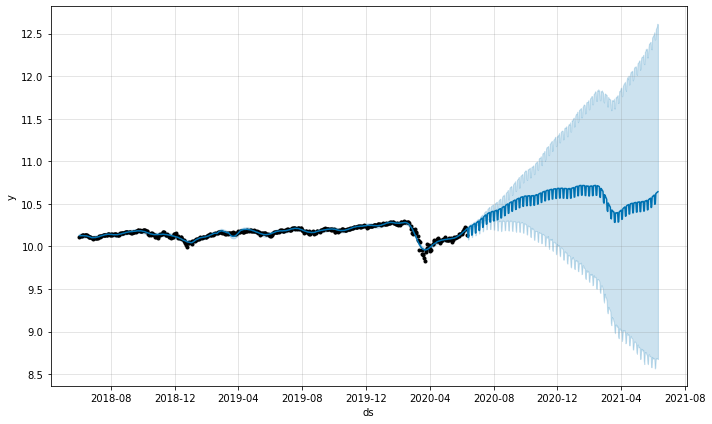

In [231]:
figure1 = m.plot(forecast)

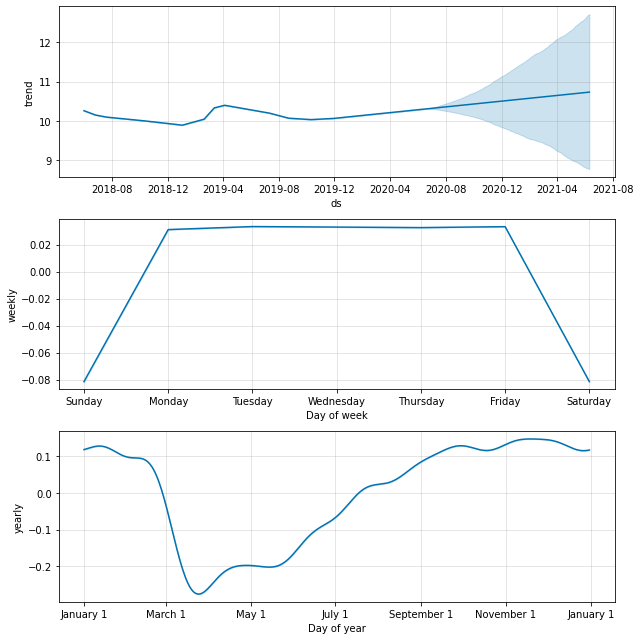

In [232]:
fig2 = m.plot_components(forecast)

# **Test Case 2** Backtesting using time series 

In [0]:
! pip install ta # it requires ta module to get momentom indicators data

In [0]:
import ta
# Fundtion to get data from online souce
def get_data(ticker, startDate, endDate, sorce):
    start_date = startDate
    end_date = endDate
    df = web.DataReader(ticker, start=start_date, end=end_date, data_source=sorce)
    df['rsi'] = ta.momentum.rsi(df['Close'],n=10,fillna=False)
    df['sma'] = df['Close'].rolling(window=21).mean()
    df.fillna(-999, inplace = True)
    return df

In [0]:
MSFT = get_data('MSFT', '2009-01-01', '2020-06-10', 'yahoo') # getting data from yahoo

Profit from 393 buy trades = 15776.0


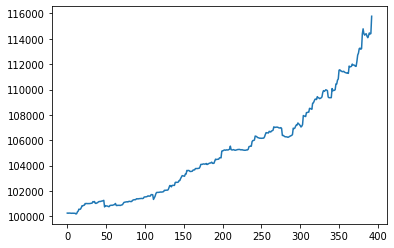

In [0]:
def buy_trade(df):
    a = 0 # variable to store buying price
    p_value = 100000 # initial portfolio value
    p_track = [] # populate the list to plot portfolio
    trade = True
    for i in range (20, len(df)):
        if trade == True:
            if df['Close'][i] > df['sma'][i] and df['rsi'][i] > 30: # if close > sma and rsi is in trading zone between 30 and 70 then Buy trae will trigger
                a = df['Open'][i+1] # buying price
                trade = False
        if trade == False:
            if df['rsi'][i] > 70 or df['Close'][i] >= a + (a * 0.5):
                s = df['Close'][i]
                p_value += (s - a) * 100
                trade = True
                p_track.append(p_value)
    return p_track
j=round(buy_trade(MSFT)[-1] - 100000, 2)
print(f"Profit from {len(buy_trade(MSFT))} buy trades = {j}")
plt.plot(buy_trade(MSFT))
plt.show()

Profit from 563 buy trades = 4942.991065979004


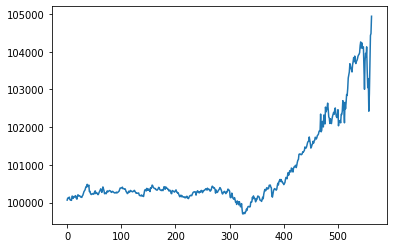

In [0]:
def sell_trade(df):
    a = 0 # variable to store selling price
    p_value = 100000 # initial portfolio value
    p_track = [] # populate the list to plot portfolio
    trade = True
    for i in range (20, len(df)):
        if trade == True:
            if df['Close'][i] < df['sma'][i] and df['rsi'][i] < 70: # if rsi is in trading zone between 30 and 70 then Buy trae will trigger
                a = df['Open'][i+1]
                trade = False
        elif trade == False:
            if df['rsi'][i] < 30 or df['Close'][i] >= a - (a * 0.5):
                s = df['Close'][i]
                p_value += (s - a) * 100
                trade = True
                p_track.append(p_value)
    return p_track
j=sell_trade(MSFT)[-1] - 100000
print(f"Profit from {len(sell_trade(MSFT))} buy trades = {j}")
plt.plot(sell_trade(MSFT))
plt.show()